<a href="https://colab.research.google.com/github/daniel8691/rental-housing-toronto/blob/master/condo_prices_scrape_n_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from splinter import Browser
from bs4 import BeautifulSoup

ModuleNotFoundError: ignored

In [2]:
url = "https://toronto.listing.ca/condo-price-history.htm"

In [3]:
housing_data = pd.read_html(url)[1]

In [4]:
housing_data

,0,1,2,3,4,5,6,7
0,Month,# of Sales,Avg List Price,Avg Sold Price,Above/Below Asking,Monthly Change ($),Monthly Change (%),Days on Market
1,July,1571,"$599,900","$612,000",2.01%,"$2,000",0.32%,12
2,June,1258,"$599,900","$610,000",1.68%,"$14,950",2.51%,11
3,May,692,"$599,400","$595,050",-0.72%,"$15,050",2.59%,14
4,April,436,"$579,900","$580,000",0.01%,"-$55,000",-8.66%,14
5,March,1308,"$599,000","$635,000",6.01%,"-$6,500",-1.01%,7
6,February,1383,"$599,900","$641,500",6.93%,"$47,000",7.9%,8
7,January,892,"$579,950","$594,500",2.5%,"$14,500",2.5%,10


In [5]:
column_names = housing_data.iloc[0].to_list()
# housing_data.columns = housing_data.iloc[0].to_list()

In [6]:
housing_data

,0,1,2,3,4,5,6,7
0,Month,# of Sales,Avg List Price,Avg Sold Price,Above/Below Asking,Monthly Change ($),Monthly Change (%),Days on Market
1,July,1571,"$599,900","$612,000",2.01%,"$2,000",0.32%,12
2,June,1258,"$599,900","$610,000",1.68%,"$14,950",2.51%,11
3,May,692,"$599,400","$595,050",-0.72%,"$15,050",2.59%,14
4,April,436,"$579,900","$580,000",0.01%,"-$55,000",-8.66%,14
5,March,1308,"$599,000","$635,000",6.01%,"-$6,500",-1.01%,7
6,February,1383,"$599,900","$641,500",6.93%,"$47,000",7.9%,8
7,January,892,"$579,950","$594,500",2.5%,"$14,500",2.5%,10


In [7]:
pd.read_html(url)[2].drop(index=0)

,0,1,2,3,4,5,6,7
1,December,791,"$579,900","$580,000",0.01%,"-$12,250",-2.06%,15
2,November,1256,"$588,800","$592,250",0.58%,"$2,250",0.38%,14
3,October,1559,"$588,800","$590,000",0.2%,"$15,100",2.62%,14
4,September,1447,"$569,000","$574,900",1.03%,"$4,900",0.85%,13
5,August,1266,"$569,000","$570,000",0.17%,"$5,000",0.88%,15
6,July,1515,"$559,000","$565,000",1.07%,"-$5,000",-0.87%,14
7,June,1376,"$569,000","$570,000",0.17%,$0,0%,13
8,May,1618,"$569,000","$570,000",0.17%,"$5,000",0.88%,12
9,April,1517,"$555,000","$565,000",1.8%,"$17,250",3.14%,11
10,March,1268,"$544,950","$547,750",0.51%,"$4,250",0.78%,11


In [8]:
placeholder_df = pd.read_html(url)[1].drop(index=0)
placeholder_df[0] = pd.to_datetime((placeholder_df[0] + ",2020"))

In [9]:
# clear output during the loop to check progress
from IPython.display import clear_output
import timeit

In [10]:
start = timeit.default_timer()

if "child_df" in globals():
    del child_df
if "parent_df" in globals():
    del parent_df

year_list = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]
# loop through all tables in the webpage
for i in list(range(1,12)):
    
    clear_output(wait=True)
    
    if i != 1:
        child_df = pd.read_html(url)[i].drop(index=0)
        child_df[0] = pd.to_datetime((child_df[0]+ f",{year_list[i-1]}"))
    else: 
        master_df = pd.read_html(url)[i].drop(index=0)
        master_df[0] = pd.to_datetime((master_df[0] + f",{year_list[i-1]}"))

    try:
        master_df = pd.concat([master_df, child_df], axis=0)
    except:
        print("master_df stored")
    
    
    stop = timeit.default_timer()
    print(f"Current Progress: {np.round(((i)/ (len(range(12))-1)) * 100, 2)}%")
    print(f"Current run time: {np.round((stop - start)/60, 2)} minutes")

Current Progress: 100.0%
Current run time: 0.24 minutes


In [11]:
master_df.head(20)

,0,1,2,3,4,5,6,7
1,2020-07-01,1571,"$599,900","$612,000",2.01%,"$2,000",0.32%,12
2,2020-06-01,1258,"$599,900","$610,000",1.68%,"$14,950",2.51%,11
3,2020-05-01,692,"$599,400","$595,050",-0.72%,"$15,050",2.59%,14
4,2020-04-01,436,"$579,900","$580,000",0.01%,"-$55,000",-8.66%,14
5,2020-03-01,1308,"$599,000","$635,000",6.01%,"-$6,500",-1.01%,7
6,2020-02-01,1383,"$599,900","$641,500",6.93%,"$47,000",7.9%,8
7,2020-01-01,892,"$579,950","$594,500",2.5%,"$14,500",2.5%,10
1,2019-12-01,791,"$579,900","$580,000",0.01%,"-$12,250",-2.06%,15
2,2019-11-01,1256,"$588,800","$592,250",0.58%,"$2,250",0.38%,14
3,2019-10-01,1559,"$588,800","$590,000",0.2%,"$15,100",2.62%,14


In [12]:
column_names

['Month',
 '# of Sales',
 'Avg List Price',
 'Avg Sold Price',
 'Above/Below Asking',
 'Monthly Change ($)',
 'Monthly Change (%)',
 'Days on Market']

In [13]:
# make column names lowercase and replace spaces with underscores
for j in range(len(column_names)):
    column_names[j] = column_names[j].lower()
    column_names[j] = column_names[j].replace(" ", "_")
    

In [14]:
master_df.columns = column_names

In [15]:
master_df.head()

,month,#_of_sales,avg_list_price,avg_sold_price,above/below_asking,monthly_change_($),monthly_change_(%),days_on_market
1,2020-07-01,1571,"$599,900","$612,000",2.01%,"$2,000",0.32%,12
2,2020-06-01,1258,"$599,900","$610,000",1.68%,"$14,950",2.51%,11
3,2020-05-01,692,"$599,400","$595,050",-0.72%,"$15,050",2.59%,14
4,2020-04-01,436,"$579,900","$580,000",0.01%,"-$55,000",-8.66%,14
5,2020-03-01,1308,"$599,000","$635,000",6.01%,"-$6,500",-1.01%,7


In [16]:
# replace headers that have $, % and # signs
master_df.rename(columns = {"#_of_sales": "num_sales", 
                  "monthly_change_($)": "month_change_dollars", 
                  "monthly_change_(%)": "monthly_change_percent"}, 
                 inplace=True)

In [17]:
master_df.head()

,month,num_sales,avg_list_price,avg_sold_price,above/below_asking,month_change_dollars,monthly_change_percent,days_on_market
1,2020-07-01,1571,"$599,900","$612,000",2.01%,"$2,000",0.32%,12
2,2020-06-01,1258,"$599,900","$610,000",1.68%,"$14,950",2.51%,11
3,2020-05-01,692,"$599,400","$595,050",-0.72%,"$15,050",2.59%,14
4,2020-04-01,436,"$579,900","$580,000",0.01%,"-$55,000",-8.66%,14
5,2020-03-01,1308,"$599,000","$635,000",6.01%,"-$6,500",-1.01%,7


In [18]:
# remove dollar signs to change datatypesto float
for a in range(master_df.shape[0]):
    master_df['avg_list_price'].iloc[a] = master_df["avg_list_price"].iloc[a].replace("$","").replace(",","")
    master_df['avg_sold_price'].iloc[a] = master_df['avg_sold_price'].iloc[a].replace("$","").replace(",","")
    master_df['above/below_asking'].iloc[a] = master_df["above/below_asking"].iloc[a].replace("%","")
    master_df['month_change_dollars'].iloc[a] = master_df["month_change_dollars"].iloc[a].replace("$","").replace(",","")
    master_df['monthly_change_percent'].iloc[a] = master_df["monthly_change_percent"].iloc[a].replace("%","")

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1 to 12
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   127 non-null    datetime64[ns]
 1   num_sales               127 non-null    object        
 2   avg_list_price          127 non-null    object        
 3   avg_sold_price          127 non-null    object        
 4   above/below_asking      127 non-null    object        
 5   month_change_dollars    127 non-null    object        
 6   monthly_change_percent  127 non-null    object        
 7   days_on_market          127 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 8.9+ KB


In [20]:
master_df.head()

,month,num_sales,avg_list_price,avg_sold_price,above/below_asking,month_change_dollars,monthly_change_percent,days_on_market
1,2020-07-01,1571,599900,612000,2.01,2000,0.32,12
2,2020-06-01,1258,599900,610000,1.68,14950,2.51,11
3,2020-05-01,692,599400,595050,-0.72,15050,2.59,14
4,2020-04-01,436,579900,580000,0.01,-55000,-8.66,14
5,2020-03-01,1308,599000,635000,6.01,-6500,-1.01,7


In [21]:
master_df.columns.values

array(['month', 'num_sales', 'avg_list_price', 'avg_sold_price',
       'above/below_asking', 'month_change_dollars',
       'monthly_change_percent', 'days_on_market'], dtype=object)

In [22]:
for b in range(1, master_df.shape[1]):
    master_df[master_df.columns.values[b]] =master_df[master_df.columns.values[b]].astype("float")


In [23]:
master_df.dtypes

month                     datetime64[ns]
num_sales                        float64
avg_list_price                   float64
avg_sold_price                   float64
above/below_asking               float64
month_change_dollars             float64
monthly_change_percent           float64
days_on_market                   float64
dtype: object

In [24]:
master_df.corr()

,num_sales,avg_list_price,avg_sold_price,above/below_asking,month_change_dollars,monthly_change_percent,days_on_market
num_sales,1.000000,-0.093682,-0.061819,0.261938,-0.004121,0.177547,-0.343982
avg_list_price,-0.093682,1.000000,0.995926,0.537956,-0.044821,0.102609,-0.716589
avg_sold_price,-0.061819,0.995926,1.000000,0.610425,-0.026509,0.124898,-0.752329
above/below_asking,0.261938,0.537956,0.610425,1.000000,0.162714,0.270839,-0.786538
month_change_dollars,-0.004121,-0.044821,-0.026509,0.162714,1.000000,0.364107,-0.180198
monthly_change_percent,0.177547,0.102609,0.124898,0.270839,0.364107,1.000000,-0.274585
days_on_market,-0.343982,-0.716589,-0.752329,-0.786538,-0.180198,-0.274585,1.000000


In [30]:
sold_price = master_df[['month','avg_sold_price']].set_index("month")

In [31]:
sold_price

,avg_sold_price
month,
2020-07-01,612000.0
2020-06-01,610000.0
2020-05-01,595050.0
2020-04-01,580000.0
2020-03-01,635000.0
...,...
2010-05-01,310000.0
2010-04-01,303000.0
2010-03-01,307500.0


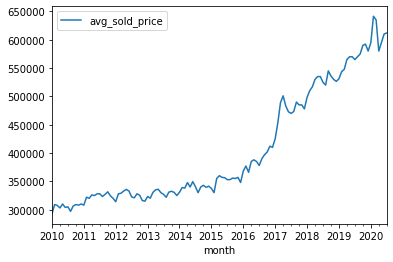

In [34]:
sold_price.plot()

Find seasonality in the trend

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
results = seasonal_decompose(sold_price)

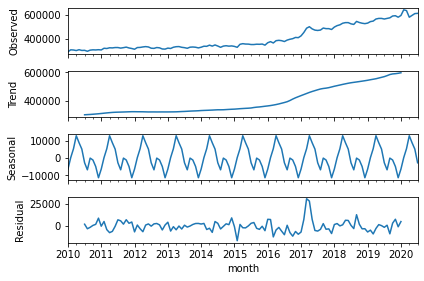

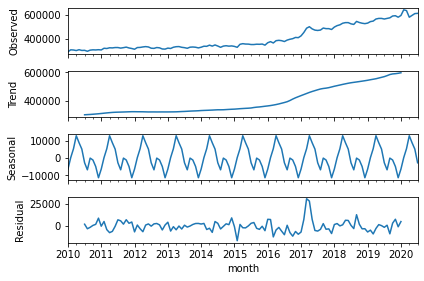

In [33]:
results.plot()

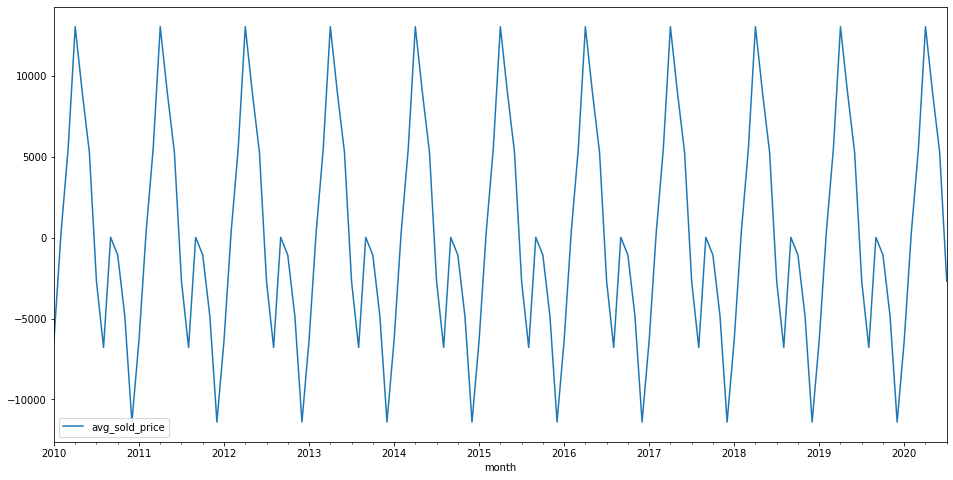

In [36]:
# get just the seasonal component
results.seasonal.plot(figsize=(16,8))

In [38]:
len(sold_price)

127

split into training and testing data. instead of using train_test_split, i'll just "predict" one year into the future, which is 12 datapoints (127 - 12 = 115)

In [48]:
# reverse the order of the dataframe so dates start from the year 2010
sold_price = sold_price.iloc[::-1]

In [49]:
train = sold_price.iloc[:115]
test = sold_price.iloc[115:]

In [53]:
train
test

,avg_sold_price
month,
2019-08-01,570000.0
2019-09-01,574900.0
2019-10-01,590000.0
2019-11-01,592250.0
2019-12-01,580000.0
2020-01-01,594500.0
2020-02-01,641500.0
2020-03-01,635000.0
2020-04-01,580000.0


In [41]:
# from sklearn.model_selection import train_test_split

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [57]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [59]:
scaled_train[:5]

array([[0.        ],
       [0.05945946],
       [0.05405405],
       [0.03783784],
       [0.06306306]])

i will use 12 for the number of inputs because yearly seasonality seem to exist for this dataset

In [60]:
# inputs is how many points we will use to predict the point after 
# input 2 means two points to predict the third point

n_input = 12
n_features = 1

# source of data and source of target are the same
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [63]:
len(scaled_train)


115

In [64]:
len(generator)

113

In [66]:
X,y = generator[0]

In [67]:
X

array([[[0.        ],
        [0.05945946]]])

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [102]:
n_input = 12
# how many columns you have
n_features = 1

# source of data and source of target are the same
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [103]:
model = Sequential()

model.add(LSTM(100, activation = 'relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [117]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
# set callback 
es = EarlyStopping(monitor='loss')
# fit to training generator
model.fit_generator(train_generator, epochs=40)

Epoch 1/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0279
Epoch 2/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0068
Epoch 3/40
103/103 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 4/40
103/103 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 5/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 6/40
103/103 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 7/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 8/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 9/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 10/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 11/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 12/40
103/103 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 13/40
103/103 [====

In [78]:
model.history.history

{'loss': [0.01965385116636753,
  0.009981946088373661,
  0.0044615366496145725,
  0.0032912995666265488,
  0.002963805105537176,
  0.0031716451048851013,
  0.002362248720601201,
  0.0024487520568072796,
  0.0021520007867366076,
  0.00226172455586493,
  0.0020298068411648273,
  0.0018912972882390022,
  0.002233971608802676,
  0.0028919330798089504,
  0.002087699482217431,
  0.0024619398172944784,
  0.00236512185074389,
  0.0017306135268881917,
  0.002635101554915309,
  0.0016701645217835903,
  0.0018143490888178349,
  0.0022324458695948124,
  0.001688956981524825,
  0.0028561577200889587,
  0.0018705143593251705]}

In [80]:
import matplotlib.pyplot as plt

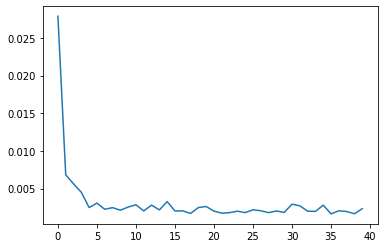

In [106]:
losses = model.history.history['loss']
plt.plot(range(len(losses)), losses)

we can start to see convergence at around 10 epochs

12 history steps => step 13

last 12 points to train => point 1 of test data

In [107]:
# last 12 points of the training set

first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.81981982],
       [0.90990991],
       [0.87747748],
       [0.85585586],
       [0.84324324],
       [0.85945946],
       [0.9045045 ],
       [0.91981982],
       [0.98198198],
       [1.        ],
       [1.        ],
       [0.98198198]])

In [108]:
first_eval_batch = first_eval_batch.reshape((1,n_input, n_features))

In [109]:
model.predict(first_eval_batch)

array([[1.0195652]], dtype=float32)

### Forecast using RNN Model

In [110]:
n_input

12

In [111]:
# hold the predictions
test_predictions = []

# last n_input points from the training model
first_eval_batch = scaled_train[-n_input:]
# reshape to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input, n_features))

# how far into the future to forecast
# len(test) should be 12(months)
# use len(test) because i want to compare with the test data
for i in range(len(test)):
  # one timestep ahead of historical 12 points
  current_prediction = model.predict(current_batch)[0] #one dimension
  
  # store prediction
  test_predictions.append(current_prediction)

  # update current batch to include prediction
  current_batch = np.append(current_batch[:,1:,:],[[current_prediction]], axis=1)


In [112]:
test_predictions

[array([1.0195652], dtype=float32),
 array([1.0339363], dtype=float32),
 array([1.0446492], dtype=float32),
 array([1.0553383], dtype=float32),
 array([1.0660553], dtype=float32),
 array([1.0771059], dtype=float32),
 array([1.0877271], dtype=float32),
 array([1.0977126], dtype=float32),
 array([1.10705], dtype=float32),
 array([1.1149738], dtype=float32),
 array([1.1220744], dtype=float32),
 array([1.1292354], dtype=float32)]

In [113]:
test_predictions = scaler.inverse_transform(test_predictions)

In [114]:
test

,avg_sold_price,predictions
month,,
2019-08-01,570000.0,539249.221087
2019-09-01,574900.0,536432.360262
2019-10-01,590000.0,533936.430663
2019-11-01,592250.0,531753.178686
2019-12-01,580000.0,529832.487255
2020-01-01,594500.0,528117.325455
2020-02-01,641500.0,526510.403305
2020-03-01,635000.0,524893.987030
2020-04-01,580000.0,523321.435601


In [115]:
test['predictions'] = test_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


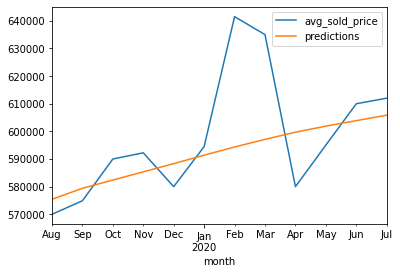

In [116]:
test.plot()

## Facebook Prophet